In [8]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import shuffle as shf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



#import pickle
#import glob as gb

from imblearn.over_sampling import SMOTE

Générateur des images

In [ ]:
# Directory containing images
path = '/Users/titouanlegourrierec/Desktop/chest_xray_global'

size = 64

# Lists to store resized images and corresponding labels
X_import = []
y_import = []

# Traverse through the directories in the images directory
for folder in os.listdir(path):
    if folder != ".DS_Store":
        files = os.listdir(os.path.join(path, folder)) # Get the list of image files in the current folder
        for file in files:
            if file.endswith('.jpeg'):
                image_path = os.path.join(path, folder, file) # Construct path to the image file
                image = cv2.imread(image_path) # Read the image using OpenCV
                resized_image = cv2.resize(image, (size, size)) # Resize the image to 64 x 64 pixels
                X_import.append(resized_image) # Append the resized image to X_import
                y_import.append(code[folder]) # Append the label of the image to y_import

# Convert lists to numpy arrays for efficient computation
X_import = np.array(X_import)
y_import = np.array(y_import)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_import, y_import, test_size=0.2, random_state=1234) # random_state=1234 to make the work reproducible

In [12]:
# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255.,  # scale pixel values to [0, 1]
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooming inside pictures
    horizontal_flip=True  # randomly flip half of the images horizontally
)

train_generator = datagen.flow_from_dataframe(  
    X_train,
    y_train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_dataframe(
    X_test,
    y_test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 5216 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(
/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Création du modèle

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

Entraînement du modèle

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=15,  # nombre d'images = batch_size * steps
      epochs=100,
      validation_data=test_generator,
      validation_steps=50,  # nombre d'images = batch_size * steps
      verbose=2)

Epoch 1/15


100/100 - 28s - loss: 0.6646 - accuracy: 0.7559 - val_loss: 1.5724 - val_accuracy: 0.5000 - 28s/epoch - 278ms/step
Epoch 2/15
100/100 - 28s - loss: 0.3611 - accuracy: 0.8503 - 28s/epoch - 277ms/step
Epoch 3/15
100/100 - 28s - loss: 0.2772 - accuracy: 0.8913 - 28s/epoch - 275ms/step
Epoch 4/15
100/100 - 29s - loss: 0.2510 - accuracy: 0.8972 - 29s/epoch - 288ms/step
Epoch 5/15
100/100 - 29s - loss: 0.2283 - accuracy: 0.9103 - 29s/epoch - 295ms/step
Epoch 6/15
100/100 - 29s - loss: 0.1952 - accuracy: 0.9209 - 29s/epoch - 291ms/step
Epoch 7/15
100/100 - 29s - loss: 0.1827 - accuracy: 0.9297 - 29s/epoch - 290ms/step
Epoch 8/15
100/100 - 29s - loss: 0.1825 - accuracy: 0.9319 - 29s/epoch - 287ms/step
Epoch 9/15
100/100 - 29s - loss: 0.1717 - accuracy: 0.9325 - 29s/epoch - 287ms/step
Epoch 10/15
100/100 - 30s - loss: 0.1622 - accuracy: 0.9409 - 30s/epoch - 297ms/step
Epoch 11/15
100/100 - 30s - loss: 0.1433 - accuracy: 0.9466 - 30s/epoch - 298ms/step
Epoch 12/15
100/100 - 29s - loss: 0.1394 - 

In [15]:
model.evaluate(test_generator)

20/20 [==============================] - 4s 221ms/step - loss: 0.5625 - accuracy: 0.7821


[0.5625074505805969, 0.7820512652397156]

NameError: name 'history' is not defined

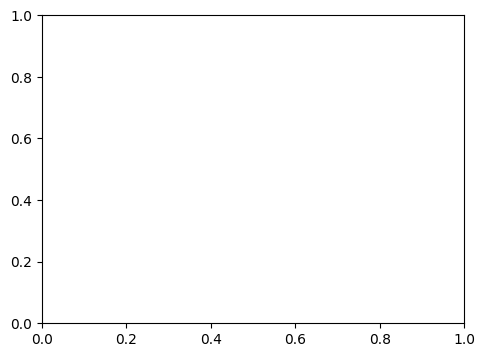

In [1]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
